## Imports/Fixing Inconsistencies

In [1]:
import pandas as pd

df = pd.read_csv('2023 WS Stats Values.csv')
df.head()

,,.1,.2,.3,.4,.5,.6,.7,.8,.9
0,Team,Name,G,AB,R,K,PO,BA,K Pct,PO/G
1,Atlanta Chaos,Roy Cody Jr,9,45,16,11,4,0.356,0.244,0.444
2,Atlanta Chaos,Garrick Scott,9,44,23,9,11,0.523,0.205,1.222
3,Atlanta Chaos,Adrian Tamplin,9,38,12,13,6,0.316,0.342,0.667
4,Atlanta Chaos,Dontre Hunt,7,31,22,4,6,0.710,0.129,0.857


In [2]:
# Making the first row the column names
df.columns = df.iloc[0]
df = df.drop(0)
df.head()

,Team,Name,G,AB,R,K,PO,BA,K Pct,PO/G
1,Atlanta Chaos,Roy Cody Jr,9,45,16,11,4,0.356,0.244,0.444
2,Atlanta Chaos,Garrick Scott,9,44,23,9,11,0.523,0.205,1.222
3,Atlanta Chaos,Adrian Tamplin,9,38,12,13,6,0.316,0.342,0.667
4,Atlanta Chaos,Dontre Hunt,7,31,22,4,6,0.710,0.129,0.857
5,Atlanta Chaos,Darnell Jacobs,8,30,10,10,0,0.333,0.333,0.000


In [3]:
# Convert columns to numeric where applicable
numeric_cols = ['G', 'AB', 'R', 'K', 'PO','K Pct', 'PO/G', 'BA']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 1 to 222
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    222 non-null    object 
 1   Name    222 non-null    object 
 2   G       222 non-null    int64  
 3   AB      222 non-null    int64  
 4   R       222 non-null    int64  
 5   K       222 non-null    int64  
 6   PO      222 non-null    int64  
 7   BA      222 non-null    float64
 8   K Pct   222 non-null    float64
 9   PO/G    222 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 17.5+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

0
Team     0
Name     0
G        0
AB       0
R        0
K        0
PO       0
BA       0
K Pct    0
PO/G     0
dtype: int64

In [7]:
# Creating a Runs per Game column
df['R/G'] = (df['R'] / df['G']).round(3)

In [8]:
df['SO/G'] = (df['K'] / df['G']).round(3)

In [9]:
df.sort_values(by='PO/G', ascending=False)

,Team,Name,G,AB,R,K,PO,BA,K Pct,PO/G,R/G,SO/G
113,Indy Edge,Eric Rodriguez,7,40,26,4,45,0.650,0.100,6.429,3.714,0.571
188,San Antonio Jets,Zach Arambula,9,43,29,6,44,0.674,0.140,4.889,3.222,0.667
178,Philly Fire,Casey Krouse,8,36,28,5,35,0.778,0.139,4.375,3.500,0.625
155,New Jersey Titans,Randy George,7,35,13,11,30,0.371,0.314,4.286,1.857,1.571
86,Gateway Archers,Ethan Johnston,8,44,28,7,33,0.636,0.159,4.125,3.500,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...
83,Cleveland Scrappers,Marion Parker,2,2,1,1,0,0.500,0.500,0.000,0.500,0.500
91,Gateway Archers,Henry Allen,6,14,7,6,0,0.500,0.429,0.000,1.167,1.000
161,New Jersey Titans,Walli Salahuddin,6,1,0,1,0,0.000,1.000,0.000,0.000,0.167
160,New Jersey Titans,Rich Koppenjan,2,2,0,1,0,0.000,0.500,0.000,0.000,0.500


## Offensive Player of the Year

In [10]:
def calculate_offensive_score(stats):
    # Define weights for each offensive metric
    runs_weight = 0.25
    strikeouts_weight = 0.3
    batting_average_weight = 0.3
    strikeout_percentage_weight = 0.3
    runs_per_game_weight = 0.5
    strikeouts_per_game_weight = 0.5
    
    # Calculate offensive score
    offensive_score = (stats['R'] * runs_weight) - \
                      (stats['K'] * strikeouts_weight) + \
                      (stats['BA'] * batting_average_weight) - \
                      (stats['K Pct'] * strikeout_percentage_weight) + \
                      (stats['R/G'] * runs_per_game_weight) - \
                      (stats['SO/G'] * strikeouts_per_game_weight)

    
    
    return offensive_score

df['Offensive_Score'] = df.apply(calculate_offensive_score, axis=1)

### First Team Offense

In [11]:
all_team_offense = df[['Team', 'Name', 'Offensive_Score']].sort_values(by='Offensive_Score', ascending=False).head()
all_team_offense.reset_index(drop=True, inplace=True)
all_team_offense.index+=1
all_team_offense

,Team,Name,Offensive_Score
1,Bayou City Heat,Tanner Gers,11.6805
2,Indy Thunder,Cody Jefferes,11.1901
3,San Antonio Jets,David Smith,10.7680
4,Indy Thunder,Gerald Dycus,10.4641
5,Indy Thunder,Zach Buhler,10.4186
...,...,...,...
96,Cleveland Scrappers,Dan Kelly,0.9400
97,Philly Fire,Dakota Hogwood,0.8666
98,Bayou City Heat,Richie Flores,0.8420
99,Oklahoma Lookouts,David Gwin,0.8176


In [12]:
off_team = all_team_offense.value_counts('Team')

## Defensive Player of the Year

In [13]:
def calculate_defensive_score(stats):
    # Define weights for each offensive metric
    putouts_weight = 0.3
    putouts_per_game_weight = 0.3
    
    # Calculate defensive score
    defensive_score = (stats['PO'] * putouts_weight) + \
                      (stats['PO/G'] * putouts_per_game_weight) / (stats['G'] * .25)
    
    return defensive_score

df['Defensive_Score'] = df.apply(calculate_defensive_score, axis=1)

### First Team Defense

In [14]:
all_team_defense = df[['Team', 'Name', 'Defensive_Score']].sort_values(by='Defensive_Score', ascending=False).head(100)
all_team_defense.reset_index(drop=True, inplace=True)
all_team_defense.index+=1
all_team_defense

,Team,Name,Defensive_Score
1,Indy Edge,Eric Rodriguez,14.602114
2,San Antonio Jets,Zach Arambula,13.851867
3,Philly Fire,Casey Krouse,11.156250
4,Gateway Archers,Ethan Johnston,10.518750
5,Cleveland Scrappers,Stanley Griffin,9.881250
...,...,...,...
96,Houston Hurricanes,Roy Hutchins,1.000000
97,SGV Panthers,Jairo Rodriguez,1.000000
98,Austin Blackhawks,Daveon Perez-R,0.973543
99,Tyler Tigers,Alex Barrera,0.973543


In [15]:
def_team = all_team_defense.value_counts('Team')

In [16]:
total_team = off_team + def_team
total_team.sort_values(ascending=False, inplace=True)
total_team

Team
Indy Thunder           19.0
Boston Renegades       15.0
Oklahoma Lookouts      14.0
Bayou City Heat        13.0
Chicago Comets         13.0
Atlanta Chaos          12.0
Austin Blackhawks      12.0
San Antonio Jets       12.0
Cleveland Scrappers    11.0
Indy Edge              11.0
Philly Fire            11.0
Tyler Tigers           11.0
Gateway Archers        10.0
Houston Hurricanes     10.0
New Jersey Titans       9.0
Minnesota Millers       6.0
Braille Bandits         NaN
SGV Panthers            NaN
St Louis Sirens         NaN
dtype: float64

## MVP 

In [17]:
def calculate_mvp_score(offensive_score, defensive_score):
    # Define weights for each metric
    offensive_weight = 0.45  # Adjusted weight for offensive metrics
    defensive_weight = 0.55
        
    # Calculate overall MVP score
    mvp_score = (offensive_score * offensive_weight) + (defensive_score * defensive_weight)
    
    return mvp_score

# Calculate offensive score
df['Offensive_Score'] = df.apply(calculate_offensive_score, axis=1)

# Calculate defensive score
df['Defensive_Score'] = df.apply(calculate_defensive_score, axis=1)

# Calculate MVP score
df['MVP_Score'] = calculate_mvp_score(df['Offensive_Score'], df['Defensive_Score'])

# Sort DataFrame by MVP score in descending order
df = df.sort_values(by='MVP_Score', ascending=False)

# Filter out players with less than 8 at-bats and sort by MVP score
df = df[df['AB'] > 8].sort_values(by='MVP_Score', ascending=False)

In [18]:
mvp = df[['Team', 'Name', 'MVP_Score']].sort_values(by='MVP_Score', ascending=False).head()
mvp.reset_index(drop=True, inplace=True)
mvp.index+=1
mvp

,Team,Name,MVP_Score
1,Indy Edge,Eric Rodriguez,11.197588
2,San Antonio Jets,Zach Arambula,10.717992
3,Philly Fire,Casey Krouse,9.344078
4,Bayou City Heat,Mike Coughlin,8.745965
5,Gateway Archers,Ethan Johnston,8.645333


## Analysis

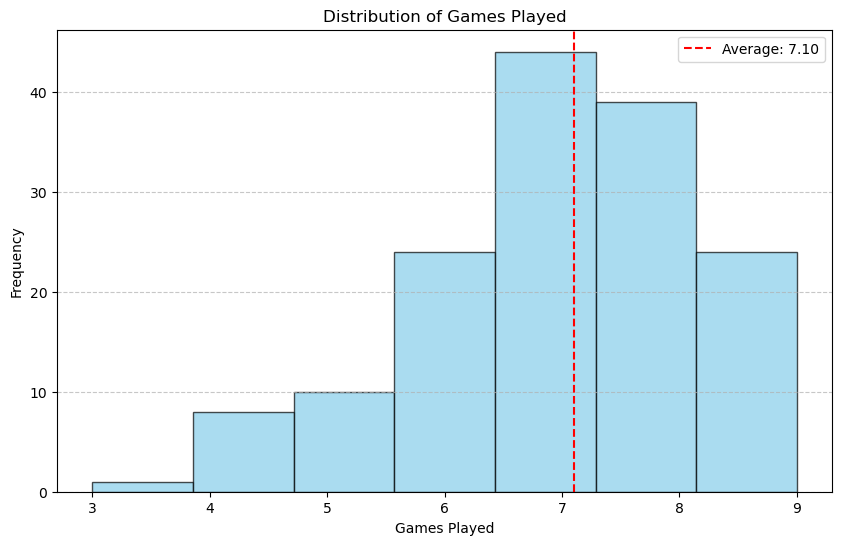

In [19]:
import matplotlib.pyplot as plt

average_games_played = df['G'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['G'], bins=7, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(average_games_played, color='red', linestyle='--', label=f'Average: {average_games_played:.2f}')
plt.xlabel('Games Played')
plt.ylabel('Frequency')
plt.title('Distribution of Games Played')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

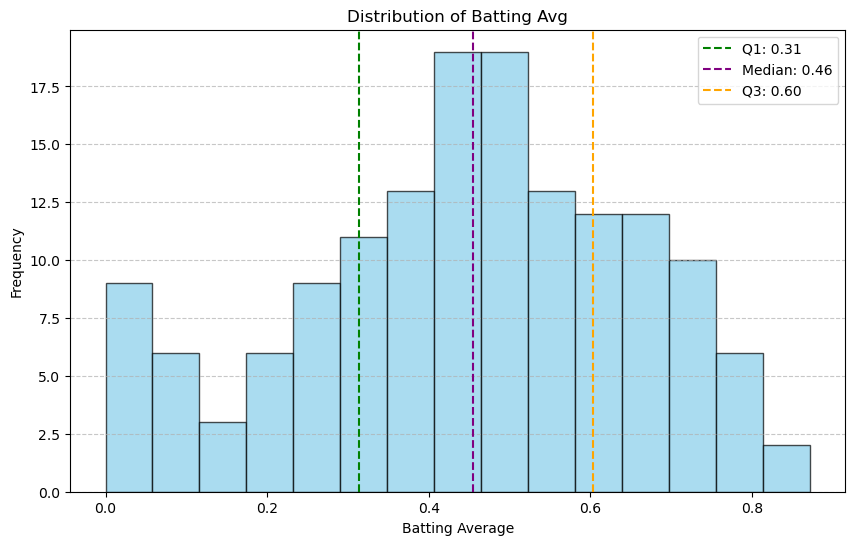

In [20]:
import numpy as np

# Calculate quartiles
q1 = np.percentile(df['BA'], 25)
q2 = np.percentile(df['BA'], 50)  # Median
q3 = np.percentile(df['BA'], 75)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['BA'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(q1, color='green', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='purple', linestyle='--', label=f'Median: {q2:.2f}')
plt.axvline(q3, color='orange', linestyle='--', label=f'Q3: {q3:.2f}')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.title('Distribution of Batting Avg')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

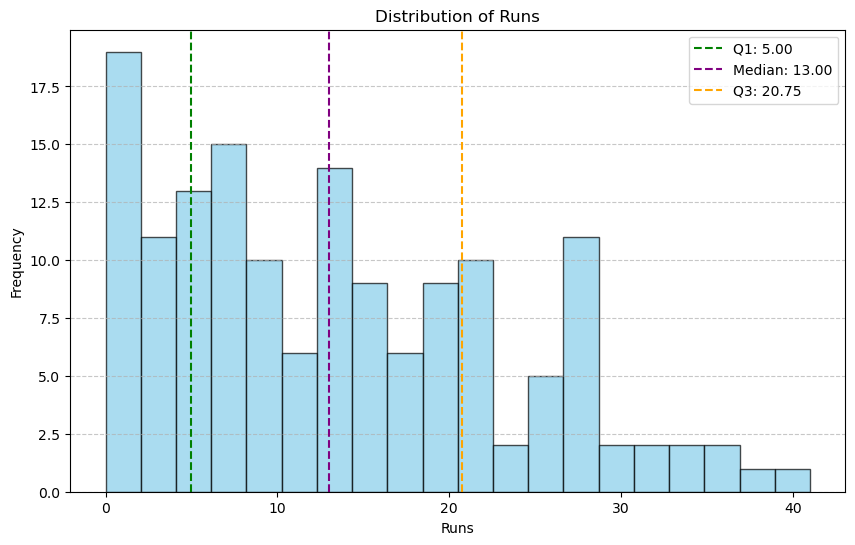

In [21]:
# Calculate quartiles for runs
q1_runs = np.percentile(df['R'], 25)
q2_runs = np.percentile(df['R'], 50)  # Median
q3_runs = np.percentile(df['R'], 75)

# Plotting for Runs
plt.figure(figsize=(10, 6))
plt.hist(df['R'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
#plt.axvline(casey, color='blue', linestyle='--', label=f'Casey Krouse: {casey:.2f}')
plt.axvline(q1_runs, color='green', linestyle='--', label=f'Q1: {q1_runs:.2f}')
plt.axvline(q2_runs, color='purple', linestyle='--', label=f'Median: {q2_runs:.2f}')
plt.axvline(q3_runs, color='orange', linestyle='--', label=f'Q3: {q3_runs:.2f}')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Runs')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

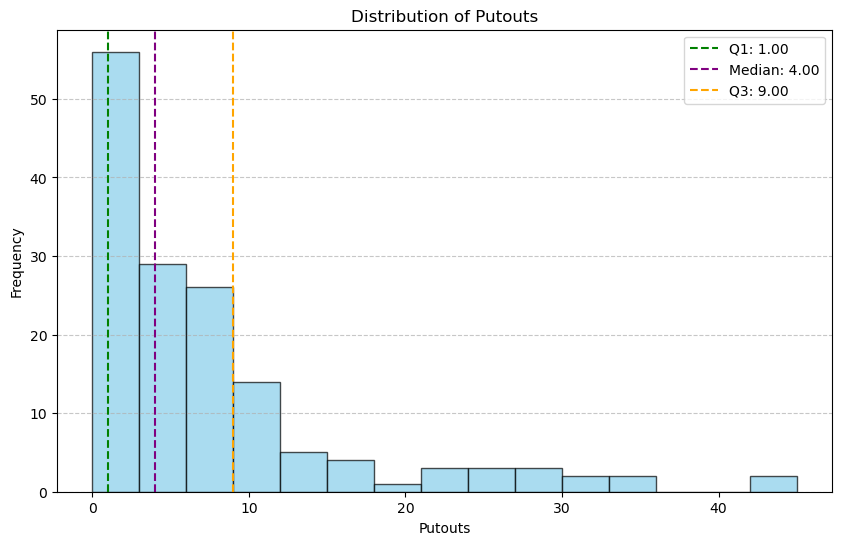

In [22]:
# Calculate quartiles for putouts
q1_putouts = np.percentile(df['PO'], 25)
q2_putouts = np.percentile(df['PO'], 50)  # Median
q3_putouts = np.percentile(df['PO'], 75)

# Plotting for Putouts
plt.figure(figsize=(10, 6))
plt.hist(df['PO'], bins='auto', color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(q1_putouts, color='green', linestyle='--', label=f'Q1: {q1_putouts:.2f}')
plt.axvline(q2_putouts, color='purple', linestyle='--', label=f'Median: {q2_putouts:.2f}')
plt.axvline(q3_putouts, color='orange', linestyle='--', label=f'Q3: {q3_putouts:.2f}')
plt.xlabel('Putouts')
plt.ylabel('Frequency')
plt.title('Distribution of Putouts')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

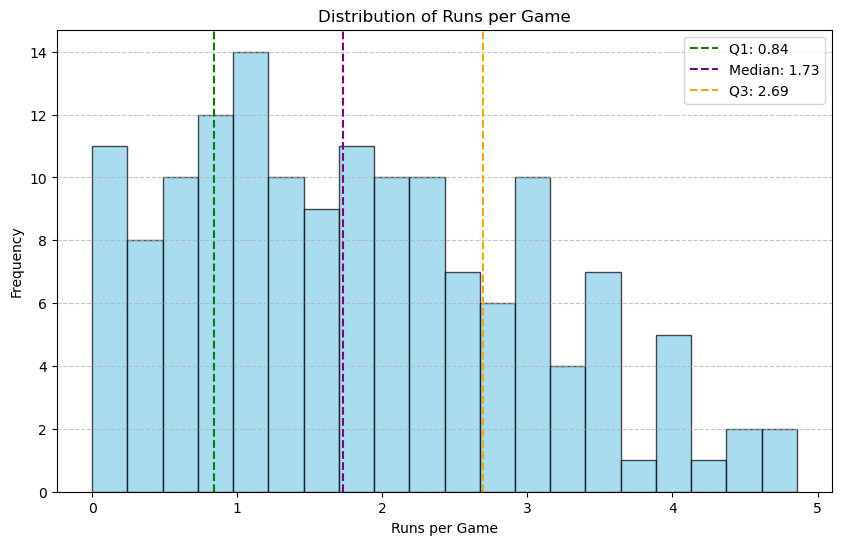

In [23]:
# Calculate quartiles for R/G
q1_rpg = np.percentile(df['R/G'], 25)
q2_rpg = np.percentile(df['R/G'], 50)  # Median
q3_rpg = np.percentile(df['R/G'], 75)

# Plotting for R/G
plt.figure(figsize=(10, 6))
plt.hist(df['R/G'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(q1_rpg, color='green', linestyle='--', label=f'Q1: {q1_rpg:.2f}')
plt.axvline(q2_rpg, color='purple', linestyle='--', label=f'Median: {q2_rpg:.2f}')
plt.axvline(q3_rpg, color='orange', linestyle='--', label=f'Q3: {q3_rpg:.2f}')
plt.xlabel('Runs per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Runs per Game')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()